<a href="https://colab.research.google.com/github/hongtir/My/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train[1234].shape

(28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[1234].shape

(28, 28, 1)

In [0]:
X = x_train[1234]

In [0]:
X = X.reshape(28, 28)

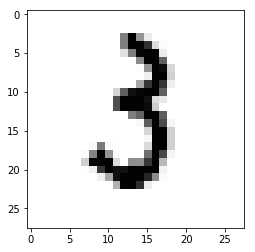

In [9]:
plt.imshow(X,  cmap='Greys')

In [10]:
y_train[1234]

3

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train[1234]

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [0]:
model = Sequential()


In [0]:
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

In [0]:
model.add(Dense(10))

In [0]:
model.add(Activation('softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 4)         404       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 8)         0         
__________

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0900 - acc: 0.1231
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0898 - acc: 0.1897
Epoch 3/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0896 - acc: 0.2349
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0891 - acc: 0.2679
Epoch 5/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0873 - acc: 0.3066
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0688 - acc: 0.4588
Epoch 7/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0307 - acc: 0.7947
Epoch 8/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0155 - acc: 0.8984
Epoch 9/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0119 - acc: 0.9218
Epoch 10/10
60000/60000 [===========================

In [31]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 970us/step


In [32]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00853
測試資料的正確率: 0.9433


In [0]:
model.save('myCNNmodel.h5')

In [34]:
pwd


'/content'

In [35]:
ls

myCNNmodel.h5  sample_data/


In [0]:
del model

In [0]:
from keras.models import load_model

In [0]:
model = load_model('myCNNmodel.h5')

In [0]:
predict = model.predict_classes(x_test)

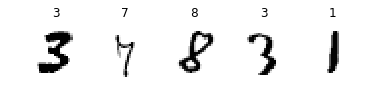

In [40]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")